In [53]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [54]:
#selected feature
colums = [
    'id',
    'host_id',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listings_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]
data = pd.read_csv('listings.csv', usecols=colums)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34744 entries, 0 to 34743
Data columns (total 17 columns):
id                      34744 non-null int64
host_id                 34744 non-null int64
host_listings_count     34743 non-null float64
latitude                34744 non-null float64
longitude               34744 non-null float64
property_type           34744 non-null object
room_type               34744 non-null object
accommodates            34744 non-null int64
bathrooms               34743 non-null float64
bedrooms                34564 non-null float64
beds                    34713 non-null float64
bed_type                34744 non-null object
price                   34744 non-null object
minimum_nights          34744 non-null int64
availability_30         34744 non-null int64
number_of_reviews       34744 non-null int64
review_scores_rating    20452 non-null float64
dtypes: float64(7), int64(6), object(4)
memory usage: 4.5+ MB


In [56]:
data.head()

,id,host_id,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,44054,192875,7.0,39.89503,116.45163,Serviced apartment,Entire home/apt,9,2.0,3.0,4.0,Real Bed,$839.00,1,22,93,91.0
1,100213,527062,4.0,40.68434,117.17231,Guest suite,Private room,2,1.0,1.0,1.0,Real Bed,"$1,198.00",1,0,2,100.0
2,114384,533062,4.0,39.90491,116.46367,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$667.00,1,30,65,93.0
3,114465,533062,4.0,39.90441,116.46524,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$617.00,1,30,9,98.0
4,114475,533062,4.0,39.90555,116.46695,Apartment,Entire home/apt,1,1.0,1.0,1.0,Real Bed,$617.00,1,30,2,100.0


In [57]:
# determine the number of missing entries in each column
for col in data.columns:
    print(col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_listings_count, Number of Missing Values: 1
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 1
bedrooms, Number of Missing Values: 180
beds, Number of Missing Values: 31
bed_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 14292


In [58]:
#remove NaN
original = len(data)
data = data.dropna(how='any', subset=['host_listings_count', 'bedrooms', 'beds', 'bathrooms'])
print('Number of NaN removed:', original - len(data))

data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

print('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print('Number of Beds 0:', len(data[data['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]
print(len(data))

Number of NaN removed: 211
Number of Accommodates 0: 0
Number of Bedrooms 0: 2294
Number of Beds 0: 488
Number of Listings with Price $0.00: 1
31825


Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


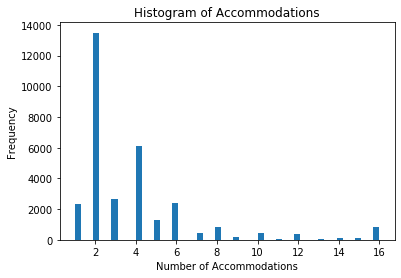

In [59]:
print('Number of Unique Accomodation: ', np.unique(data['accommodates']))
# visualize distribution of price (target variable)
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 36. 38. 40.
 41. 45. 46. 50. 58.]


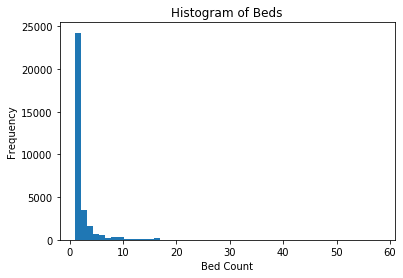

In [60]:
print('Number of Unique Beds: ', np.unique(data['beds']))
# visualize distribution of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

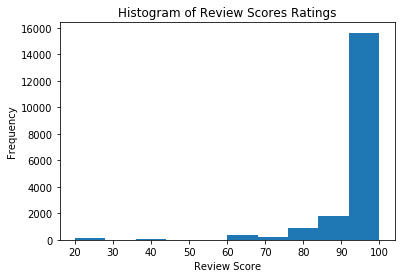

In [61]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

In [62]:
# turn NaN scores with 0 reviews into 'No Reviews'
print(len(data))
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
print(len(data))
data.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')
print(len(data))
# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]
print(len(data))


31825
31825
31825
19048


In [63]:
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)

In [66]:
# encode categorical variables

property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
bed_dummies = pd.get_dummies(data['bed_type'])
ratings_scores_dummies = pd.get_dummies(data['review_scores_rating'])

# replace the old columns with our new one-hot encoded ones
df = pd.concat((data.drop(['property_type', 'room_type', 'bed_type', 'review_scores_rating'], axis=1), \
    property_dummies.astype(int), \
    room_dummies.astype(int), bed_dummies.astype(int), ratings_scores_dummies.astype(int)), \
    axis=1)

print('Number of Columns:', len(df.columns))

# move target predictor 'price' to the end of the dataframe
cols = list(df.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
df = df[rearrange_cols]

Number of Columns: 71


In [68]:
# convert non-categorical variables to floats and standardize
def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listings_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = standardize_col(df[col])

df.head()

,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,price
0,44054,192875,-0.153088,39.89503,116.45163,1.983547,0.578216,1.255647,0.971227,-0.089371,...,0,0,0,0,0,0,0,1,0,839.0
1,100213,527062,-0.281121,40.68434,117.17231,-0.595420,-0.278160,-0.507990,-0.534097,-0.089371,...,0,0,0,0,0,0,0,0,1,1198.0
2,114384,533062,-0.281121,39.90491,116.46367,-0.595420,-0.278160,-0.507990,-0.534097,-0.089371,...,0,0,0,0,0,0,0,1,0,667.0
3,114465,533062,-0.281121,39.90441,116.46524,-0.595420,-0.278160,-0.507990,-0.534097,-0.089371,...,0,0,0,0,0,0,0,0,1,617.0
4,114475,533062,-0.281121,39.90555,116.46695,-0.963844,-0.278160,-0.507990,-0.534097,-0.089371,...,0,0,0,0,0,0,0,0,1,617.0


7985.0


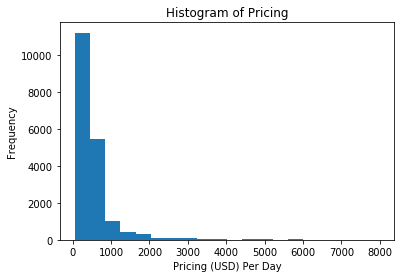

In [77]:
# visualize distribution of price (target variable)

df = df[df['price'] <= 8000.0]
print(df['price'].max())
plt.hist(df['price'], bins=20)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

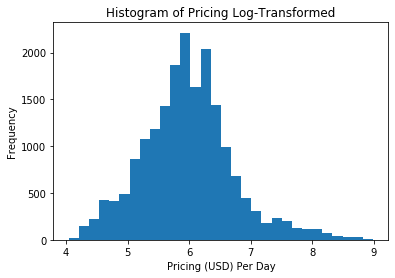

In [80]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))
# visualize distribution of price (target variable)
plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

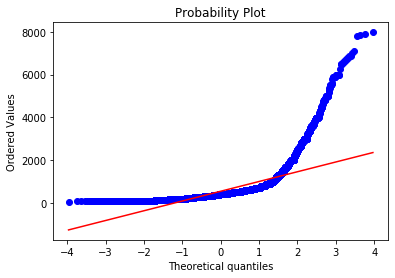

In [81]:
# qq plot for log-transformed pricing
stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

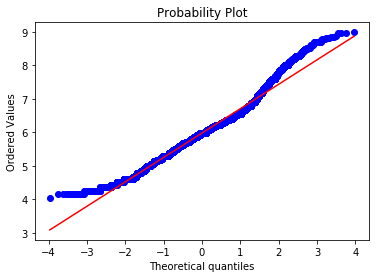

In [82]:
# qq plot for log-transformed pricing
stats.probplot(df['price_log'], dist="norm", plot=pylab)
pylab.show()

In [83]:
# read to csv
df.to_csv('listings_clean.csv', index=False)

In [91]:
data_c = pd.read_csv('calendar.csv')
data_fill = data_c[['listing_id', 'date', 'available', 'adjusted_price']]
data_fill['adjusted_price'] = (data_fill['adjusted_price'].str.replace(r'[^-+\d.]', '').astype(float))
data_fill.head()


/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,listing_id,date,available,adjusted_price
0,1941997,2019-01-18,t,428.0
1,1942067,2019-01-18,t,428.0
2,1942067,2019-01-19,t,428.0
3,1942067,2019-01-20,t,428.0
4,1942067,2019-01-21,t,428.0


In [92]:
data_fill.to_csv("calendar_clean.csv",index=False)